In [1]:
#dataset = http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2020-11-19 04:09:12--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-11-19 04:09:12--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-11-19 04:09:13--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-11-19 04:09:13--  https://www.dropbox.com/s/raw/7rjw

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
train_path = "CovidDataset/Train"
val_path = "CovidDataset/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
#cnn based model in keras 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [6]:
#training
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen=image.ImageDataGenerator(rescale=1./255)


In [7]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator=test_datagen.flow_from_directory(
   'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary' 
)

Found 60 images belonging to 2 classes.


In [10]:
hist= model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 7s 1s/step - loss: 1.2120 - accuracy: 0.5312 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 0.6914 - accuracy: 0.4948 - val_loss: 0.6863 - val_accuracy: 0.6833
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.6564 - accuracy: 0.6979 - val_loss: 0.6268 - val_accuracy: 0.8833
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 0.4516 - accuracy: 0.8229 - val_loss: 0.3087 - val_accuracy: 0.9000
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 0.3697 - accuracy: 0.8333 - val_loss: 0.2770 - val_accuracy: 0.9167
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 0.2968 - accuracy: 0.8906 - val_loss: 0.1984 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: 0.2550 - accuracy: 0.8802 - val_l

In [11]:
model.save("model_adv.h5")

In [12]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.13221518695354462, 0.9375]

In [13]:
model.evaluate_generator(validation_generator)

[0.0706784799695015, 0.9833333492279053]

In [14]:
model = load_model('model_adv.h5')

In [15]:
import os

In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
y_actual=[]
y_test=[]

In [20]:
for i in os.listdir("CovidDataset/Val/Normal/"):
  img=image.load_img("CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img= np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [21]:
for i in os.listdir("CovidDataset/Val/Covid/"):
  img=image.load_img("CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img= np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [22]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y_actual, y_test)

In [25]:
import seaborn as sns

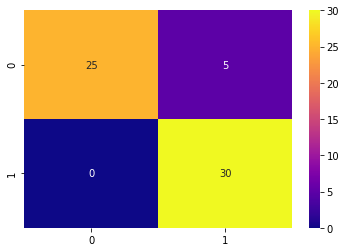

In [26]:
sns.heatmap(cm, cmap='plasma', annot=True)